# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# Use "pip install citipy"
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:

#Make URL with api key and imperial units to get Fahrenheit temperatures
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

#Make lists to store city name, cloudiness, country, date, humidity, lat, lng, max temp, and wind speed
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
mTemp = []
windSpd = []

#Make for loop 
z=0
for x in cities:
#print out string that says it's searching for the city
#Starter while loop to test code before pulling big numbers
    
    print(f"Searching for {x} at index {z}..." )
#Make new url by adding city to end of URL

    response = requests.get(url+x).json()
        #Try to append the name to list by response['name']
    try:
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        mTemp.append(response['main']['temp_max'])
        windSpd.append(response['wind']['speed'])
        #Except if name doesn't exist in list
        #print out that the city wasn't found
    except:
        print("City does not exist. Skipping...")
        z += 1
        pass
    z += 1
        #Next city


riffith at index 111...
Searching for kandrian at index 112...
Searching for tessalit at index 113...
Searching for saint-philippe at index 114...
Searching for marsa matruh at index 115...
Searching for carnarvon at index 116...
Searching for magnolia at index 117...
Searching for bathsheba at index 118...
Searching for cabo san lucas at index 119...
Searching for sentyabrskiy at index 120...
City does not exist. Skipping...
Searching for dokka at index 122...
Searching for genhe at index 123...
Searching for brae at index 124...
Searching for mys shmidta at index 125...
City does not exist. Skipping...
Searching for deputatskiy at index 127...
Searching for jamestown at index 128...
Searching for amderma at index 129...
City does not exist. Skipping...
Searching for vaitupu at index 131...
City does not exist. Skipping...
Searching for hungund at index 133...
Searching for dourbali at index 134...
Searching for nueva granada at index 135...
Searching for storforshei at index 136...
S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#Make dictionaries of the list of the city weather properties
weather_dict ={
    "Name":name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temp": mTemp,
    "Wind Speed":windSpd
}
#Make dataframe from the list
weather_data = pd.DataFrame(weather_dict)

#Convert the time from UTC to date
for x in weather_data["Date"]:
    weather_data["Date"] = datetime.datetime.utcfromtimestamp(x)

#Print the DataFrame
print(weather_data.head())

#Print the total number of fields in the DataFrame
print(len(weather_data))

,Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Touros,100,BR,2020-03-14 00:41:29,100,-5.20,-35.46,75.20,10.60
1,Port Alfred,26,ZA,2020-03-14 00:41:29,97,-33.59,26.89,69.01,4.00
2,Dabakala,26,CI,2020-03-14 00:41:29,67,8.37,-4.43,81.41,5.93
3,Jumla,23,NP,2020-03-14 00:41:29,65,29.27,82.18,25.75,7.40
4,Kapaa,90,US,2020-03-14 00:41:29,64,22.08,-159.32,77.00,12.75


In [10]:
#Print out the dataframe
weather_data.to_csv("output_data/cities.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

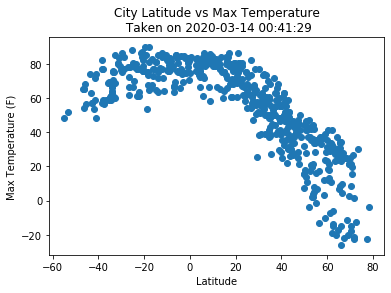

In [59]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/temp_lat.png")
plt.show()

#### Latitude vs. Humidity Plot

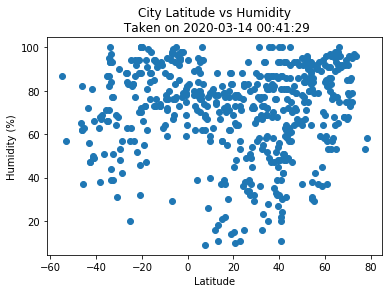

In [60]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/humid_lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

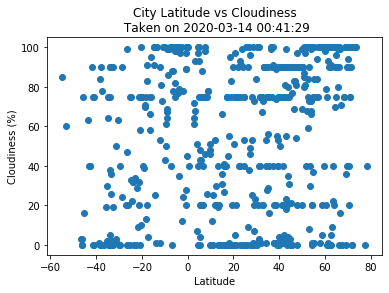

In [61]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/cloud_lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

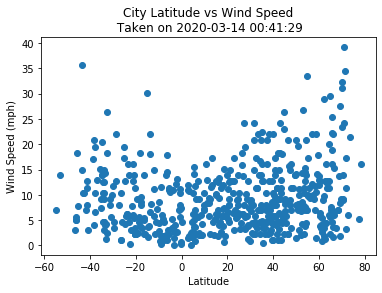

In [62]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/wind_lat.png")
plt.show()

## Linear Regression

In [63]:
# OPTIONAL: Create a function to create Linear Regression plots
def LinReg(x,y):
    #Using scipy stats to make linear regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept

    #Set the line variable to be used outside of this function
    global line_eq
    #Make the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Overlays the line on data outside of the function
    plt.plot(x,regress_values,"r-")

    #Get r squared value
    r_squared = rvalue*rvalue
    
    #Prints the r squared value for the given data
    print("The r squared value is: " + str(r_squared))


In [64]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
south_df = weather_data.loc[weather_data["Latitude"] <= 0,:]
print(north_df.head())
print(south_df.head())

Name  Cloudiness Country                Date  Humidity  Latitude  \
2    Dabakala          26      CI 2020-03-14 00:41:29        67      8.37   
3       Jumla          23      NP 2020-03-14 00:41:29        65     29.27   
4       Kapaa          90      US 2020-03-14 00:41:29        64     22.08   
8   Saskylakh           0      RU 2020-03-14 00:41:29        95     71.92   
11   Circasia          40      CO 2020-03-14 00:41:29        78      4.62   

    Longitude  Max Temp  Wind Speed  
2       -4.43     81.41        5.93  
3       82.18     25.75        7.40  
4     -159.32     77.00       12.75  
8      114.08    -22.72       11.41  
11     -75.64     75.20        1.57  
          Name  Cloudiness Country                Date  Humidity  Latitude  \
0       Touros         100      BR 2020-03-14 00:41:29       100     -5.20   
1  Port Alfred          26      ZA 2020-03-14 00:41:29        97    -33.59   
5       Atuona          43      PF 2020-03-14 00:41:29        64     -9.80   
6     

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is: 0.7634103036749834


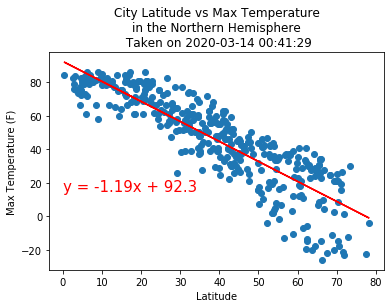

In [65]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature\nin the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Max Temp'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.savefig("output_data/north_temp_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is: 0.301077657840972


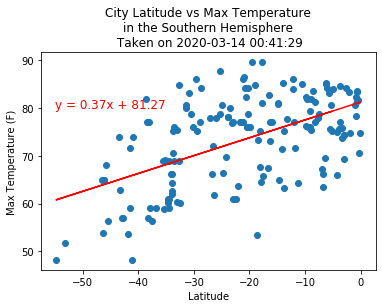

In [66]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature\nin the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Max Temp'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-55,80),fontsize=12,color="red")
plt.savefig("output_data/south_temp_lat_linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is: 0.04754018218451545


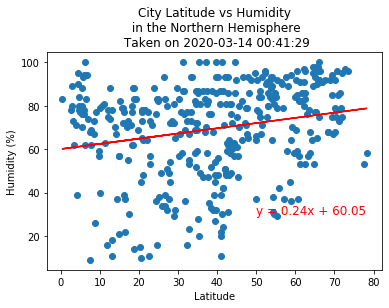

In [67]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity\n in the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Humidity'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.savefig("output_data/north_humid_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is: 0.12600838892154878


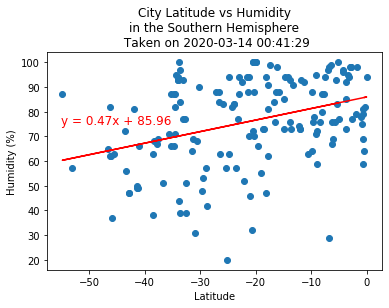

In [68]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity\nin the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Humidity'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-55,75),fontsize=12,color="red")
plt.savefig("output_data/south_humid_lat_linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is: 0.04705146397986001


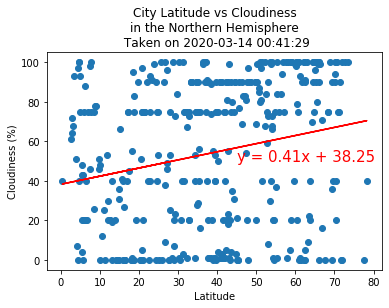

In [69]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness\nin the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Cloudiness'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.savefig("output_data/north_cloud_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is: 0.2094347286714995


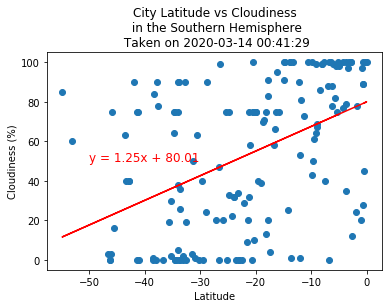

In [70]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness\n in the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Cloudiness'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-50,50),fontsize=12,color="red")
plt.savefig("output_data/south_cloud_lat_linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is: 0.07810235197952436


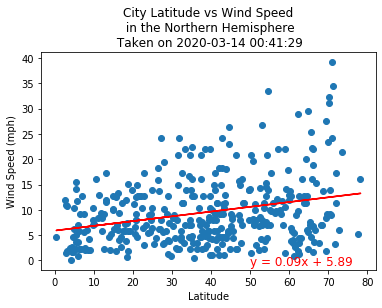

In [71]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed\n in the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Wind Speed'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(50,-1),fontsize=12,color="red")
plt.savefig("output_data/noth_wind_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is: 0.07959367233943873


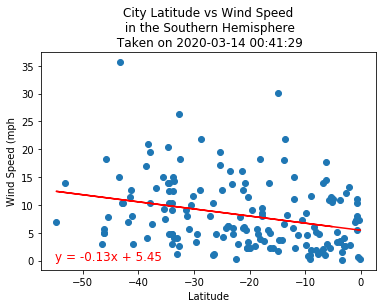

In [72]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph")
plt.title(f"City Latitude vs Wind Speed\n in the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Wind Speed'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.savefig("output_data/south_wind_lat_linreg.png")
plt.show()